In [1]:
import matplotlib.pyplot as plt
import numpy as np

[6, 6]
[7, 7]
[8, 7]


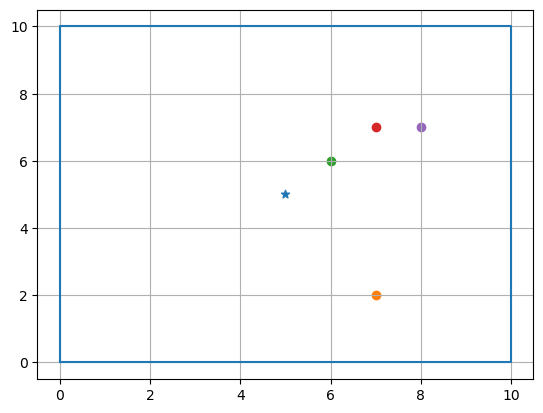

In [2]:
robot_pos =  [5,5]
goal_pos = [7,2]

def dibujar():
    plt.grid(True)
    plt.scatter(robot_pos[0], robot_pos[1], marker = "*") # dibuja la posicion del robot
    plt.scatter(goal_pos[0], goal_pos[1]) # dibula la posicion de la meta
    plt.plot([0,0,10, 10,0], [0,10,10,0,0]) # dibujamos un cuadro delimitando el espacio de trabajo

dibujar()

# stopx = abs(goal_pos[0] - robot_pos[0]) + 1
# stopy = abs(goal_pos[1] - robot_pos[1]) + 1

# for i in range(stopx):
#     print(robot_pos[0])
#     plt.scatter(robot_pos[0] + i, robot_pos[1], marker="*")

# robot_pos[0] += stopy -1

# for i in range(1, abs(goal_pos[1] - robot_pos[1])+1):
#     print(i)
#     plt.scatter(robot_pos[0]-1, robot_pos[1]-i, marker = "+")

    
dx = robot_pos[0] - goal_pos[0]
dy = robot_pos[1] - goal_pos[1]

robot_pos =  [5,5]
goal_pos = [8,7]
pos = robot_pos[:]

while pos[0] != goal_pos[0] or pos[1] != goal_pos[1]:
    if pos[0]>goal_pos[0]:
        pos[0]-=1
    if pos[0]<goal_pos[0]:
        pos[0]+=1
    if pos[1]>goal_pos[1]:
        pos[1]-=1
    if pos[1]<goal_pos[1]:
        pos[1]+=1

    print(pos)
    plt.scatter(pos[0], pos[1], marker = "o")
        

In [3]:
def dibujar(gp):
    plt.grid(True)
    #plt.scatter(gp[0], gp[1]) # dibula la posicion de la meta
    plt.plot([0,0,10, 10,0], [0,10,10,0,0]) # dibujamos un cuadro delimitando el espacio de trabajo

In [4]:
class Nodo():
    def __init__(self, estado):
        self.estado = estado
        self.hijos = []
    
    def genera_hijos(self, obstaculos, limites):
        # uno arriba
        pos_arriba = self.pos[:]
        pos_arriba[1] += 1

        # uno abajo
        pos_abajo = self.pos[:]
        pos_abajo[1] -= 1
        
        # uno izq
        pos_izq = self.pos[:]
        pos_izq [0] -= 1
        
        # uno der
        pos_der = self.pos[:]
        pos_der[0] += 1
        
        # diagonales

        #checar validez de nuestro punto
        # 1. no choque
        # 2. este adentro de los limites  
        if limites[0] <= pos_arriba[0] <= limites[2] and limites[1] <= pos_arriba[1] <= limites[3] :
            # esta en el limite permitido
            for o in obstaculos:
                if not o.en_colision(pos_arriba):
                    self.hijos.append(Nodo(pos_arriba))

        if limites[0] <= pos_abajo[0] <= limites[2] and limites[1] <= pos_abajo[1] <= limites[3] :
            # esta en el limite permitido
            for o in obstaculos:
                if not o.en_colision(pos_abajo):
                    self.hijos.append(Nodo(pos_abajo))

        if limites[0] <= pos_izq[0] <= limites[2] and limites[1] <= pos_izq[1] <= limites[3] :
            # esta en el limite permitido
            for o in obstaculos:
                if not o.en_colision(pos_izq):
                    self.hijos.append(Nodo(pos_izq))

        if limites[0] <= pos_der[0] <= limites[2] and limites[1] <= pos_der[1] <= limites[3] :
            # esta en el limite permitido
            for o in obstaculos:
                if not o.en_colision(pos_der):
                    self.hijos.append(Nodo(pos_der))
            




In [5]:
class Robot():
    def __init__(self, pos = [5,5], limites = [0,0,10,10], obstaculos = []):
        self.pos = pos
        self.limites = limites
        self.obstaculos = obstaculos
        self.trajectory = []
    
    def agrega_obstaculo(self, obs):
        self.obstaculos.append(obs)

    def plot_robot(self):
        plt.scatter(self.pos[0], self.pos[1])

    def BPP(self):
        pass

    def go_to_pos(self, goal_pos):
        self.trajectory += self.pos
        print(f"{self.limites[1]} <= {self.pos[1]} <= {self.limites[3]} and {self.limites[0]} <= {self.pos[0]} <= {self.limites[2]:}")
        if self.limites[1] <= self.pos[1] <= self.limites[3] and self.limites[0] <= self.pos[0] <= self.limites[2]:

            while self.pos[0] != goal_pos[0] or self.pos[1] != goal_pos[1]:


                if self.pos[0]>goal_pos[0]:
                    self.pos[0]-=1
                if self.pos[0]<goal_pos[0]:
                    self.pos[0]+=1
                if self.pos[1]>goal_pos[1]:
                    self.pos[1]-=1
                if self.pos[1]<goal_pos[1]:
                    self.pos[1]+=1

                if self.obstaculos[0].en_colision(self.pos):
                    print("Ya valio")

                self.trajectory += self.pos
                print(f"x: {self.pos[0]}, y: {self.pos[1]}")
                #self.plot_robot()
                #plt.scatter(self.pos[0], self.pos[1], marker = "*")

    def mover_arriba(self):
        self.pos[1] += 1

    def mover_abajo(self):
        self.pos[1] -= 1
    
    def mover_derecha(self):
        self.pos[0] += 1
    
    def mover_izquierda(self):
        self.pos[0] -= 1

In [6]:
class Obstaculo():
    def __init__(self, v1, v2):
        self.v1 = v1 # esquina superior
        self.v2 = v2 # esquina inferior

    def en_colision(self, punto):
        if self.v1[0] <= punto[0] <= self.v2[0] and self.v2[1] <= punto[1] <= self.v1[1]:
            return True
        return False
    
    def dibuja(self):
        x = [self.v1[0], self.v2[0], self.v2[0], self.v1[0], self.v1[0]]
        y = [self.v1[1], self.v1[1], self.v2[1], self.v2[1], self.v1[1]]
        plt.plot(x,y)
        


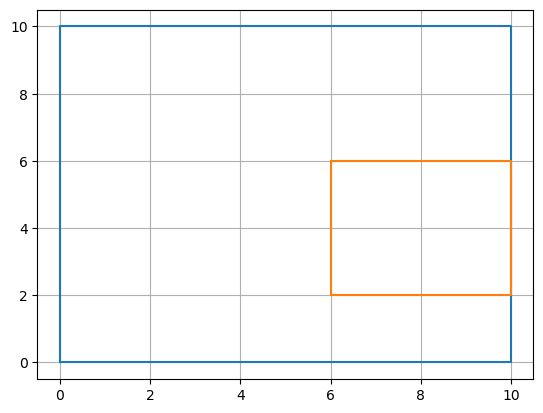

In [7]:
dibujar([])
obs = Obstaculo([6,6], [10,2])
obs.dibuja()

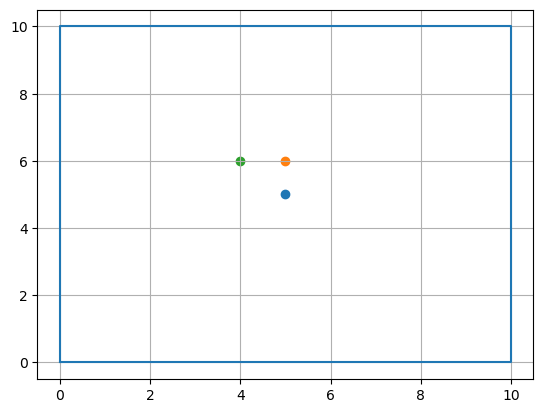

In [8]:
wall_E = Robot()

dibujar([5,6])

wall_E.plot_robot()
wall_E.mover_arriba()
wall_E.plot_robot()
wall_E.mover_izquierda()
wall_E.plot_robot()
wall_E.mover_abajo()


0 <= 0 <= 10 and 0 <= 5 <= 10
x: 6, y: 1
Ya valio
x: 7, y: 2
Ya valio
x: 8, y: 3
Ya valio
x: 8, y: 4
Ya valio
x: 8, y: 5
Ya valio
x: 8, y: 6
x: 8, y: 7
x: 8, y: 8


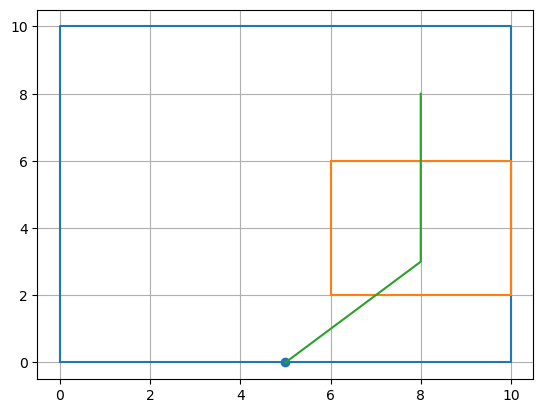

In [9]:
wall_E = Robot([5,0])
wall_E.agrega_obstaculo(Obstaculo([6,6],[10,2]))
dibujar([5,6])
wall_E.obstaculos[0].dibuja()
wall_E.plot_robot()
wall_E.go_to_pos([8,8])
plt.plot(wall_E.trajectory[0::2], wall_E.trajectory[1::2])

